In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2
import sys

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1091)>


In [13]:
data = pd.read_csv('datanorepeat.csv')
data.shape

(1627, 10)

In [14]:
data.dtypes

name            object
author          object
section         object
publish         object
age             object
year           float64
pages          float64
rating          object
cove            object
description     object
dtype: object

In [15]:
data.isnull().sum()

name              1
author         1215
section           0
publish         316
age             545
year             21
pages           120
rating            0
cove              0
description       3
dtype: int64

In [18]:
data7 = data
data7 = data7.dropna(subset=['description', 'name'])
data7.isnull().sum()

name              0
author         1214
section           0
publish         314
age             545
year             19
pages           118
rating            0
cove              0
description       0
dtype: int64

In [19]:
data7.shape

(1623, 10)

In [24]:
data7['section'].unique()

array(['Саморазвитие и личностный рост', 'Популярная психология',
       'Копирайтинг', 'Популярная медицина', 'Психология личности',
       'Кино', 'Классическая психология', 'Лидерство',
       'Предпринимательство', 'Языкознание', 'Психология бизнеса',
       'Русский язык'], dtype=object)

In [28]:
data7.iloc[30]

name                                   источник внутренней силы 
author                                            Вания Маркович
section                           Саморазвитие и личностный рост
publish                                                    Эксмо
age                                                         16+ 
year                                                      2022.0
pages                                                      240.0
rating                                                        5 
cove           https:https://cdn.book24.ru/v2/ITD000000001140...
description    Вы наверняка встречали словосочетание «эмоцион...
Name: 31, dtype: object

In [29]:
data.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma/dataclean.csv', index=False)

In [30]:
data = pd.read_csv('dataclean.csv')
data.shape

(1627, 10)

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

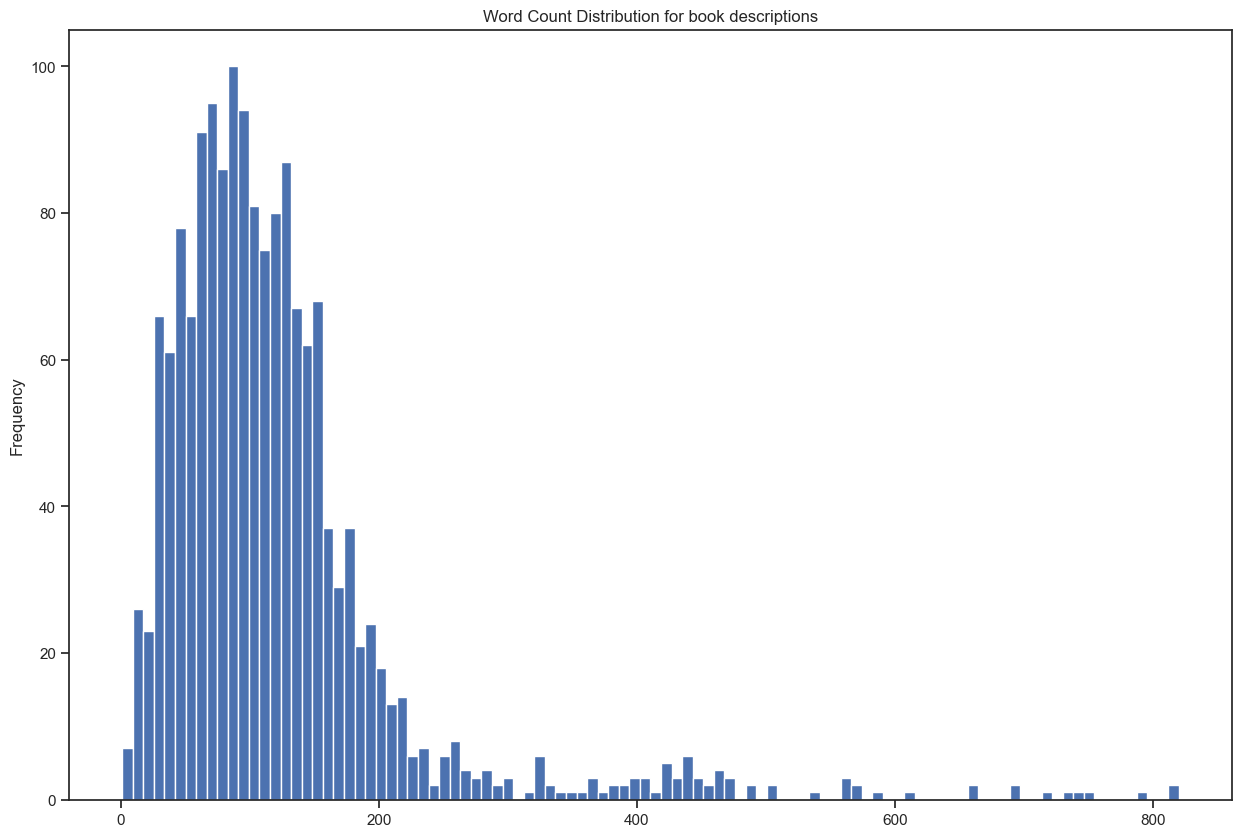

In [32]:
# анализ размера описаний
data['word_count'] = data['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
data['word_count'].plot(
    kind='hist',
    bins = 100,
    figsize = (15,10),title='Word Count Distribution for book descriptions')

In [33]:
data.author[1]

'Татьяна Мужицкая'

In [34]:
re.sub(" ","", data.author[1])

'ТатьянаМужицкая'

In [39]:
author_new = []
for i in data.index:
    author_new.append(re.sub(" ","", str(data.author[i])))

In [40]:
len(author_new)

1627

In [42]:
description_new = []
for i in data.index:
    description_new.append(str(data.description[i]))
for i in range(len(description_new)):
    description_new[i] = re.sub("[^А-Яа-я, ё, \n, -]", "", description_new[i])
    description_new[i] = description_new[i].lower()
    description_new[i] = re.sub(",", " ", description_new[i])
    description_new[i] = re.sub("\n", " ", description_new[i])
    description_new[i] = re.sub("-", " ", description_new[i])

In [45]:
data.description[100]

'Новая книга популярного блогера, автора ярких стихов и психолога, Евгении Лисёнковой «С тобой всё так! 11 способов приручить своих тараканов и жить счастливо» будет полезна всем, кто хочет наладить отношения с собой, принять себя, разобраться с чувством вины и стать счастливым. В книге представлены самые актуальные психологические советы и техники, для усиления их эффективности автор воспользовалась «стихотерапией» — основные советы зарифмовала в виде запоминающихся психологических стихов, что делает чтение книги легче, а усвоение полезной информации проще.'

In [53]:
description_new[100]

'новая книга популярного блогера  автора ярких стихов и психолога  евгении лисёнковой с тобой всё так  способов приручить своих тараканов и жить счастливо будет полезна всем  кто хочет наладить отношения с собой  принять себя  разобраться с чувством вины и стать счастливым в книге представлены самые актуальные психологические советы и техники  для усиления их эффективности автор воспользовалась стихотерапией  основные советы зарифмовала в виде запоминающихся психологических стихов  что делает чтение книги легче  а усвоение полезной информации проще'

In [55]:
stop_words = stopwords.words('russian')

In [54]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [57]:
def stopslova(text):
    y = []

    for i in text.split():
        if not i in stop_words:
            y.append(i)

    return " ".join(y)

In [60]:
stopslova('мне конечно понравилась эта книга')

'понравилась эта книга'

In [73]:
data['tags'] = data.apply(lambda _: '', axis=1)
description_new = pd.DataFrame(description_new)
data['foo'] = data.apply(lambda _: ' ', axis=1)
description_new.head()

,0
0,чувствовать себя полным силвставать каждое утр...
1,когда ты себя любишь ты точно знаешь чего хо...
2,эта книга полностью изменит вашу жизнь ведь ре...
3,книга полна грубоватых и прикольных советов по...
4,психотрюки это простые приемы которые помога...


In [65]:
%%time
abc = []
for i in range(len(description_new[0])):
    abc.append(stopslova(description_new[0][i]))

CPU times: user 445 ms, sys: 14.6 ms, total: 460 ms
Wall time: 459 ms


In [66]:
abc[0]

'чувствовать полным силвставать каждое утро той ноги испытывать воодушевление приступая сложной задаче вроде ремонта квартиры поиска работы новая книга татьяны мужицкой это уникальная система практик которая поможет оставаться ресурсе эпидемии рвануть недельку тай посидеть ресторане друзьями татьяна объясняет черпать жизненные силы зависит внешних обстоятельств подход основан одноименном марафоне течение полугода прошли человек отзывы говорят сами брать давать наслаждаться это целая система отношений собой миром превращающая настоящий генератор вдохновения бодрости собой любить наслаждаться моментом часто слышим слова пытаемся соответствовать кажется именно нужно заменить нужно сделать это легко удовольствием татьяна мужицкая великий специалист счастью удовольствию доверьтесь вашей радости любви хватит близких весь мир татьяна лазарева актриса телеведущая общественный деятель'

In [67]:
description_new[0][1]

'когда ты себя любишь  ты точно знаешь  чего хочешь  и идешь к этому  но как избавиться от негативного шума в голове  принять себя  перестать сомневаться в будущем и излучать в мир счастье и позитив татьяна мужицкая  известный психолог и бизнес тренер  поделится техниками  как соединить в себе энергии иня и яна отдаться на волю обстоятельств и одновременно трансформировать мир  наполнив его собой эта книга научит вас принимать подарки от вселенной  получать удовольствие от жизни и любить себя в каждом своем проявлении  татьяна  мой надежный партнер по игре в жизнь это хранитель высочайшей категории  которому можно доверять на все сто ей удается хранить тайну  разбалтывая ее всем и каждому  максимально корректно и доходчиво после прочтения этой книги любви к себе появится столько  что любой из вас почувствует право делать самое главное в жизни  бесстрашно творить ее и себя в ней  вадим демчог  актер  режиссер  психолог  кандидат психологических наук'

In [74]:
descr = pd.DataFrame(abc)

In [75]:
descr

,0
0,чувствовать полным силвставать каждое утро той...
1,любишь точно знаешь хочешь идешь этому избавит...
2,эта книга полностью изменит вашу жизнь речь не...
3,книга полна грубоватых прикольных советов рабо...
4,психотрюки это простые приемы которые помогают...
...,...
1622,хронический стресс тревога приступы паники нав...
1623,годы экономического спада стране подкосили мно...
1624,высокочувствительные люди новые интроверты наз...
1625,кинесика это молчаливый язык язык тела помощью...


In [76]:
morph = pymorphy2.MorphAnalyzer()

In [78]:
def parse(text):
    y = []

    for i in text.split():
        y.append(morph.parse(i)[0].normal_form)

    return " ".join(y)

In [79]:
morph.parse('возвращается')[0].normal_form

'возвращаться'

In [80]:
parse('шестерка воронов - следующая глава в истории этого мира судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита каза бреккера и его команды')

'шестёрка воронов - следующий глава в история это мир судьба и будущее могущественный нация гриша внезапно оказываться в рука хладнокровный бандит каз бреккер и он команда'

In [82]:
%%time
abc = []
for i in range(len(description_new[0])):
    abc.append(parse(description_new[0][i]))

CPU times: user 53 s, sys: 594 ms, total: 53.6 s
Wall time: 53.9 s


In [89]:
description_new[0][45]

'эмпатия  это ключ к успеху исследователи доказали  что более  информации мы передаем невербально и только   словами поэтому для эффективной коммуникации нужно использовать не только речь  но и жесты  мимику  тон голоса улучшив эти навыки  вы сможете устроить личную жизнь  находить друзей и даже продвигаться по карьерной лестницеэто некое шестое чувство  почти что чтение мыслей с помощью этой книги вы научитесь не только узнавать  что происходит в голове у другого  но и принять тот факт  что чужие убеждения могут отличаться от наших она даст вам  ключей  благодаря которым вы научитесь находить подход к каждому человеку  быть терпимее и не попадать в неловкие ситуации'

In [90]:
abc[45]

'эмпатия это ключ к успех исследователь доказать что более информация мы передавать невербальный и только слово поэтому для эффективный коммуникация нужно использовать не только речь но и жест мимика тон голос улучшить этот навык вы смочь устроить личный жизнь находить друг и даже продвигаться по карьерный лестницеэтый некий шестой чувство почти что чтение мысль с помощь этот книга вы научиться не только узнавать что происходить в голова у другой но и принять тот факт что чужой убеждение мочь отличаться от наш она дать вы ключ благодаря который вы научиться находить подход к каждый человек быть терпимый и не попадать в неловкий ситуация'

In [91]:
for i in range(len(description_new[0])):
    description_new[0][i] = abc[i]

data['tags'] = description_new[0] + data['foo'] + data[
    'section']

In [93]:
data

,name,author,section,publish,age,year,pages,rating,cove,description,word_count,tags,foo
0,"Брать, давать и наслаждаться. Как оставаться в...",Татьяна Мужицкая,Саморазвитие и личностный рост,NaN,16+,2022.0,256.0,5,https://ndc.book24.ru/resize/410x590/iblock/3d...,Чувствовать себя полным сил. Вставать каждое у...,184,чувствовать себя полный силвставать каждый утр...,
1,Роман с самим собой. Как уравновесить внутренн...,Татьяна Мужицкая,Саморазвитие и личностный рост,NaN,16+,2022.0,304.0,5,https:https://cdn.book24.ru/v2/ITD000000001044...,"Когда ты себя любишь, ты точно знаешь, чего хо...",149,когда ты себя любить ты точно знать что хотеть...,
2,Думай медленно... решай быстро,Даниэль Канеман,Популярная психология,АСТ,16+,2022.0,656.0,"4,6",https://ndc.book24.ru/resize/410x590/iblock/0a...,Эта книга полностью изменит вашу жизнь: ведь р...,68,этот книга полностью изменить ваш жизнь ведь р...,
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,Джен Синсеро,Саморазвитие и личностный рост,NaN,16+,2022.0,320.0,"4,2",https://ndc.book24.ru/resize/410x590/iblock/54...,Книга полна грубоватых и прикольных советов по...,131,книга полный грубоватый и прикольный совет по ...,
4,"Психотрюки. 69 приемов в общении, которым не у...",Игорь Рызов,Саморазвитие и личностный рост,NaN,12+,2022.0,256.0,5,https://ndc.book24.ru/resize/410x590/iblock/74...,"Психотрюки — это простые приемы, которые помог...",108,психотрюк это простой приём который помогать п...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,Счастливая жизнь без панических атак и страхов,NaN,Саморазвитие и личностный рост,Издательские решения,16+,2016.0,120.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/28...,"Хронический стресс, тревога, приступы паники, ...",74,хронический стресс тревога приступ паника навя...,
1623,Думай и богатей в годы безденежья,NaN,Саморазвитие и личностный рост,NaN,16+,2018.0,192.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/fe...,"Годы экономического спада в стране ""подкосили""...",64,год экономический спад в страна подкосить мног...,
1624,"Близко к сердцу. Как жить, если вы слишком чув...",Санд И.,Саморазвитие и личностный рост,Альпина,NaN,2016.0,158.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/fe...,"Высокочувствительные люди, или «новые интровер...",120,высокочувствительный человек или новый интрове...,
1625,"Занимательная кинесика, или Тайны жестов, поз,...",NaN,Саморазвитие и личностный рост,Прометей,NaN,2022.0,480.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/4c...,"Кинесика — это молчаливый язык, язык тела, с п...",196,кинесика это молчаливый язык язык тело с помощ...,


In [94]:
data.tags[0]

'чувствовать себя полный силвставать каждый утро с тот нога испытывать воодушевление приступать к сложный задача вроде ремонт квартира или поиск работа новый книга татьяна мужицкий это уникальный система практика который помочь всегда оставаться в ресурс даже когда из за эпидемия нельзя рвануть на неделька в тая или посидеть в ресторан с друг татьяна объяснять как черпать жизненный сила из тот что не зависеть от внешний обстоятельство она подход основать на одноимённый марафон только в течение полгода он пройти более человек они отзыв говорить сам за себя брать давать и наслаждаться это целый система отношение с себя и мир превращать мы в настоящий генератор вдохновение и бодрость быть себя здесь и сейчас любить себя наслаждаться момент мы часто слышать этот слово и пытаться они соответствовать казаться что именно так и нужно а если заменить нужно на можно и сделать это легко и с удовольствие татьяна мужицкий великий специалист по счастие и удовольствие довериться она и тогда ваш радос

In [95]:
new_df = data[['name', 'tags']]
new_df

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствовать себя полный силвставать каждый утр...
1,Роман с самим собой. Как уравновесить внутренн...,когда ты себя любить ты точно знать что хотеть...
2,Думай медленно... решай быстро,этот книга полностью изменить ваш жизнь ведь р...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книга полный грубоватый и прикольный совет по ...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк это простой приём который помогать п...
...,...,...
1622,Счастливая жизнь без панических атак и страхов,хронический стресс тревога приступ паника навя...
1623,Думай и богатей в годы безденежья,год экономический спад в страна подкосить мног...
1624,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительный человек или новый интрове...
1625,"Занимательная кинесика, или Тайны жестов, поз,...",кинесика это молчаливый язык язык тело с помощ...


In [96]:
new_df.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma/tags.csv', index=False)

In [97]:
descr[:5]

,0
0,чувствовать полным силвставать каждое утро той...
1,любишь точно знаешь хочешь идешь этому избавит...
2,эта книга полностью изменит вашу жизнь речь не...
3,книга полна грубоватых прикольных советов рабо...
4,психотрюки это простые приемы которые помогают...


In [98]:
descr[0][1]

'любишь точно знаешь хочешь идешь этому избавиться негативного шума голове принять перестать сомневаться будущем излучать мир счастье позитив татьяна мужицкая известный психолог бизнес тренер поделится техниками соединить энергии иня яна отдаться волю обстоятельств одновременно трансформировать мир наполнив собой эта книга научит принимать подарки вселенной получать удовольствие жизни любить каждом своем проявлении татьяна надежный партнер игре жизнь это хранитель высочайшей категории которому доверять сто удается хранить тайну разбалтывая всем каждому максимально корректно доходчиво прочтения книги любви появится столько любой почувствует право делать самое главное жизни бесстрашно творить вадим демчог актер режиссер психолог кандидат психологических наук'

In [104]:
import spacy
nlp = spacy.load('ru_core_news_sm')

In [105]:
def spacylem(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc]
   return " ".join(tokens)

In [106]:
spacylem('птицы летели низко')

'птица лететь низко'

In [107]:
%%time
abc = []
for i in range(len(descr[0])):
    abc.append(spacylem(descr[0][i]))

CPU times: user 58.5 s, sys: 1.6 s, total: 1min
Wall time: 1min


In [109]:
abc[0]

'чувствовать полный силвставать каждый утро тот нога испытывать воодушевление приступая сложный задаче вроде ремонт квартира поиск работа новый книга татьяна мужицкой это уникальный система практика которая помочь оставаться ресурсе эпидемия рвануть неделька тай посидеть ресторане друг татьяна объяснять черпать жизненный сила зависеть внешний обстоятельство подход основать одноимённый марафон течение полугода пройти человек отзыв говорить сами брать давать наслаждаться это целый система отношение себя мир превращать настоящий генератор вдохновение бодрость себя любить наслаждаться момент часто слышать слово пытаться соответствовать казаться именно нужный заменить нужный сделать это легко удовольствие татьяна мужицкий великий специалист счастью удовольствие доверьтесь ваш радость любовь хватить близкий весь мир татьяна лазарев актриса телеведущий общественный деятель'

In [110]:
for i in range(len(descr[0])):
    descr[0][i] = abc[i]

In [111]:
data['tags'] = descr[0]

In [112]:
new_dfspacy = data[['name', 'tags']]
new_dfspacy

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствовать полный силвставать каждый утро тот...
1,Роман с самим собой. Как уравновесить внутренн...,любить точно знать хотеть идти это избавиться ...
2,Думай медленно... решай быстро,этот книга полностью изменить ваш жизнь речь н...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книга полна грубоватый прикольный совет работа...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюки это простой приём которые помогать ...
...,...,...
1622,Счастливая жизнь без панических атак и страхов,хронический стресс тревога приступы паника нав...
1623,Думай и богатей в годы безденежья,год экономический спад страна подкосить многих...
1624,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительный человек новый интроверт н...
1625,"Занимательная кинесика, или Тайны жестов, поз,...",кинесика это молчаливый язык язык тело помощью...


In [113]:
new_dfspacy.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma/spacylem.csv', index=False)

In [114]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='russian')
tokenizer = nltk.tokenize.WhitespaceTokenizer()

def stemming(text):
   tokens = [stemmer.stem(w) for w in tokenizer.tokenize(text)]
   return " ".join(tokens)

In [115]:
stemming('неожиданно пошёл дождь')

'неожида пошел дожд'

In [116]:
%%time
cba = []
for i in range(len(new_dfspacy['tags'])):
    cba.append(stemming(new_dfspacy['tags'][i]))

CPU times: user 7.65 s, sys: 63.6 ms, total: 7.71 s
Wall time: 7.85 s


In [117]:
cba[0]

'чувствова полн силвстава кажд утр тот ног испытыва воодушевлен приступ сложн задач врод ремонт квартир поиск работ нов книг татья мужицк эт уникальн систем практик котор помоч остава ресурс эпидем рванут недельк та посидет ресторан друг татья объясня черпа жизнен сил зависет внешн обстоятельств подход основа одноимен марафон течен полугод пройт человек отз говор сам брат дава наслажда эт цел систем отношен себ мир превраща настоя генератор вдохновен бодрост себ люб наслажда момент част слыша слов пыта соответствова каза имен нужн замен нужн сдела эт легк удовольств татья мужицк велик специалист счаст удовольств доверьт ваш радост любов хват близк ве мир татья лазар актрис телеведущ обществен деятел'

In [118]:
descr = pd.DataFrame(descr)

In [119]:
descr

,0
0,чувствовать полный силвставать каждый утро тот...
1,любить точно знать хотеть идти это избавиться ...
2,этот книга полностью изменить ваш жизнь речь н...
3,книга полна грубоватый прикольный совет работа...
4,психотрюки это простой приём которые помогать ...
...,...
1622,хронический стресс тревога приступы паника нав...
1623,год экономический спад страна подкосить многих...
1624,высокочувствительный человек новый интроверт н...
1625,кинесика это молчаливый язык язык тело помощью...


In [120]:
for i in range(len(new_dfspacy['tags'])):
    descr[0][i] = cba[i]

In [121]:
data['tags'] = descr[0] + data['foo'] + data['section']

In [122]:
new_dfspacy = data[['name', 'tags']]
new_dfspacy

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствова полн силвстава кажд утр тот ног испы...
1,Роман с самим собой. Как уравновесить внутренн...,люб точн знат хотет идт эт избав негативн шум ...
2,Думай медленно... решай быстро,этот книг полност измен ваш жизн реч нерациона...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книг полн грубоват прикольн совет работ сво об...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк эт прост при котор помога постав хам...
...,...,...
1622,Счастливая жизнь без панических атак и страхов,хроническ стресс тревог приступ паник навязчив...
1623,Думай и богатей в годы безденежья,год экономическ спад стран подкос мног человек...
1624,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительн человек нов интроверт назыв...
1625,"Занимательная кинесика, или Тайны жестов, поз,...",кинесик эт молчалив язык язык тел помощ котор ...


In [123]:
new_dfspacy['tags'][0]

'чувствова полн силвстава кажд утр тот ног испытыва воодушевлен приступ сложн задач врод ремонт квартир поиск работ нов книг татья мужицк эт уникальн систем практик котор помоч остава ресурс эпидем рванут недельк та посидет ресторан друг татья объясня черпа жизнен сил зависет внешн обстоятельств подход основа одноимен марафон течен полугод пройт человек отз говор сам брат дава наслажда эт цел систем отношен себ мир превраща настоя генератор вдохновен бодрост себ люб наслажда момент част слыша слов пыта соответствова каза имен нужн замен нужн сдела эт легк удовольств татья мужицк велик специалист счаст удовольств доверьт ваш радост любов хват близк ве мир татья лазар актрис телеведущ обществен деятел Саморазвитие и личностный рост'

In [124]:
new_dfspacy.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma/spacylem.csv', index=False)

In [125]:
new_dfspacy = pd.read_csv('spacylem.csv')

In [126]:
new_dfspacy[:5]

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствова полн силвстава кажд утр тот ног испы...
1,Роман с самим собой. Как уравновесить внутренн...,люб точн знат хотет идт эт избав негативн шум ...
2,Думай медленно... решай быстро,этот книг полност измен ваш жизн реч нерациона...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книг полн грубоват прикольн совет работ сво об...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк эт прост при котор помога постав хам...


In [127]:
len(abc)

1627

In [129]:
%%time
cba = []
for i in range(1627):
    cba.append(stemming(abc[i]))

CPU times: user 7.57 s, sys: 56.2 ms, total: 7.63 s
Wall time: 7.71 s


In [132]:
prover = []
for i in range(1627):
    if new_dfspacy['tags'][i] != cba[i]:
        prover.append(i)

In [133]:
len(prover)

1627

In [134]:
%%time
cba = []
for i in range(len(new_df['tags'])):
    cba.append(stemming(new_df['tags'][i]))

CPU times: user 12.3 s, sys: 114 ms, total: 12.4 s
Wall time: 12.7 s


In [135]:
descr = pd.DataFrame(descr)

In [136]:
for i in range(len(new_df['tags'])):
    descr[0][i] = cba[i]

In [137]:
data['tags'] = descr[0] + data['foo'] + data['section']

In [138]:
new_df = data[['name', 'tags']]
new_df

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствова себ полн силвстава кажд утр с тот но...
1,Роман с самим собой. Как уравновесить внутренн...,когд ты себ люб ты точн знат что хотет и идт к...
2,Думай медленно... решай быстро,этот книг полност измен ваш жизн вед реч в он ...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книг полн грубоват и прикольн совет по работ н...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк эт прост при котор помога постав хам...
...,...,...
1622,Счастливая жизнь без панических атак и страхов,хроническ стресс тревог приступ паник навязчив...
1623,Думай и богатей в годы безденежья,год экономическ спад в стран подкос мног челов...
1624,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительн человек ил нов интроверт та...
1625,"Занимательная кинесика, или Тайны жестов, поз,...",кинесик эт молчалив язык язык тел с помощ кото...


In [139]:
new_df.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma/tags2.csv', index=False)

In [141]:
new_df = pd.read_csv('tags2.csv')
new_df['tags'][0]

'чувствова себ полн силвстава кажд утр с тот ног испытыва воодушевлен приступа к сложн задач врод ремонт квартир ил поиск работ нов книг татья мужицк эт уникальн систем практик котор помоч всегд остава в ресурс даж когд из за эпидем нельз рванут на недельк в та ил посидет в рестора с друг татья объясня как черпа жизнен сил из тот что не зависет от внешн обстоятельств он подход основа на одноимен марафон тольк в течен полгод он пройт бол человек он отз говор сам за себ брат дава и наслажда эт цел систем отношен с себ и мир превраща мы в настоя генератор вдохновен и бодрост быт себ зде и сейчас люб себ наслажда момент мы част слыша этот слов и пыта он соответствова каза что имен так и нужн а есл замен нужн на можн и сдела эт легк и с удовольств татья мужицк велик специалист по счаст и удовольств довер он и тогд ваш радост и любов хват не тольк на себ и на близк на ве мир татья лазар актрис телеведущ и обществен деятел саморазвит и личностн рост Саморазвитие и личностный рост'